# NBA Data Analysis: RAPTOR Metrics And Individual Success

In this project I am analyzing data about the NBA from different sources. The advantage of being both interested in data analysis and basketball is that they mesh with each other quite well. Every basketball game produces a large number of data points, like points, assists, rebounds, steals, blocks or fouls. Advanced metrics are created to gain more insight into productivity and efficiency. One of these advanced metrics is the <a href= "https://fivethirtyeight.com/features/how-our-raptor-metric-works/">Raptor metric</a>. It is a relatively new metric and i want to explore, if it accurately describes success on an individual level. I will combine this data set with the <a href= "https://www.kaggle.com/open-source-sports/mens-professional-basketball">Men's professional basketball data set</a> and try to quantify individual success in the NBA.

### Setup

Importing libraries.

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### First impressions of the data

In [45]:
nba = pd.read_csv("nba-data-historical.csv", encoding = "ISO-8859-1")
print(nba.info())
print(nba.sample(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20059 entries, 0 to 20058
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    20059 non-null  object 
 1   name_common  20059 non-null  object 
 2   year_id      20059 non-null  int64  
 3   age          20059 non-null  int64  
 4   pos          20059 non-null  object 
 5   team_id      20059 non-null  object 
 6   tmRtg        20059 non-null  float64
 7   franch_id    20059 non-null  object 
 8   G            20059 non-null  int64  
 9   Min          20059 non-null  int64  
 10  MP%          20059 non-null  float64
 11  MPG          20059 non-null  float64
 12  P/36         20054 non-null  float64
 13  TS%          19964 non-null  float64
 14  A/36         20054 non-null  float64
 15  R/36         20054 non-null  float64
 16  SB/36        20054 non-null  float64
 17  TO/36        20054 non-null  float64
 18  Raptor O     20059 non-null  float64
 19  Rapt

In [46]:
print(nba["TS%"].describe())
nbats = nba.sort_values(by=["TS%"], ascending=False)
print(nbats.head(25))

count    19964.000000
mean        50.651393
std          9.912388
min          0.000000
25%         47.500000
50%         51.900000
75%         55.500000
max        150.000000
Name: TS%, dtype: float64
       player_id           name_common  year_id  age pos team_id  tmRtg  \
1759   hayesni01           Nigel Hayes     2018   23  SF     TOR    7.9   
591    siberjo01         Jordan Sibert     2019   26  SG     ATL   -5.7   
1565   brownan02         Anthony Brown     2018   25  SF     MIN    2.3   
1781   mitrona01       Naz Mitrou-Long     2018   24  SG     UTA    4.5   
1190   jenkijo01          John Jenkins     2019   27  SG     WAS   -2.8   
16915  josepyv01           Yvon Joseph     1986   28   C     NJN   -1.9   
13228  connele01         Lester Conner     1995   35  SG     LAL   -0.2   
16160   lampje01             Jeff Lamp     1988   28  SF     LAL    5.9   
2691   fredeji01       Jimmer Fredette     2016   26  SG     NYK   -2.9   
8438   harvedo01        Donnell Harvey     2005 

I am suspecting that this list mostly consists of outliers, therefor i filter it by minutes played. Players should have played at least on full quarter per game (12 minutes * 82 regular season games = 984 minutes).

In [47]:
nba1 = nba[nba["Min"] >= 984]
nba1_ts = nba1.sort_values(by=["TS%"], ascending=False)
print(nba1_ts.head(25))

       player_id        name_common  year_id  age pos team_id  tmRtg  \
366    robinmi01  Mitchell Robinson     2020   21   C     NYK   -6.5   
387     noelne01       Nerlens Noel     2020   25   C     OKC    2.5   
4842   chandty01     Tyson Chandler     2012   29   C     NYK    3.4   
2228   chandty01     Tyson Chandler     2017   34   C     PHO   -5.6   
18118  gilmoar01      Artis Gilmore     1982   32   C     CHI   -2.0   
530    goberru01        Rudy Gobert     2020   27   C     UTA    3.2   
18458  gilmoar01      Artis Gilmore     1981   31   C     CHI    2.0   
2867   korveky01        Kyle Korver     2015   33  SG     ATL    5.8   
5123   chandty01     Tyson Chandler     2011   28   C     DAL    4.6   
2976   chandty01     Tyson Chandler     2015   32   C     DAL    3.0   
254    howardw01      Dwight Howard     2020   34   C     LAL    7.3   
3566   wrighbr03     Brandan Wright     2014   26   C     DAL    2.5   
971    robinmi01  Mitchell Robinson     2019   20   C     NYK   

This list consists mostly centers, which makes sense, because they tend to take more high percentage shots like dunks and shots close to the basket. However, in the modern NBA centers are rarely the main focus. The three point shot plays a big role in todays game, making guards and wing players the main offensive weapons. 

       player_id        name_common  year_id  age pos team_id  tmRtg   G  \
2493   curryst01      Stephen Curry     2016   27  PG     GSW   10.7  79   
6385    paulch01         Chris Paul     2009   23  PG     NOH    1.8  78   
14784  jordami01     Michael Jordan     1991   27  SG     CHI    9.5  82   
6156   jamesle01       LeBron James     2009   24  SF     CLE   10.0  81   
3034   curryst01      Stephen Curry     2015   26  PG     GSW   10.2  80   
...          ...                ...      ...  ...  ..     ...    ...  ..   
11008  stockjo01      John Stockton     2000   37  PG     UTA    5.0  82   
11433  robinda01     David Robinson     1999   33   C     SAS    9.0  49   
8403   garneke01      Kevin Garnett     2005   28  PF     MIN    1.6  82   
9422    kiddja01         Jason Kidd     2003   29  PG     NJN    5.7  80   
12831  hardaan01  Anfernee Hardaway     1996   24  PG     ORL    6.0  82   

        Min   MPG  ...  Raptor+/-  Raptor WAR  PIE%  AWS%  USG%   2P%   3P%  \
2493   2

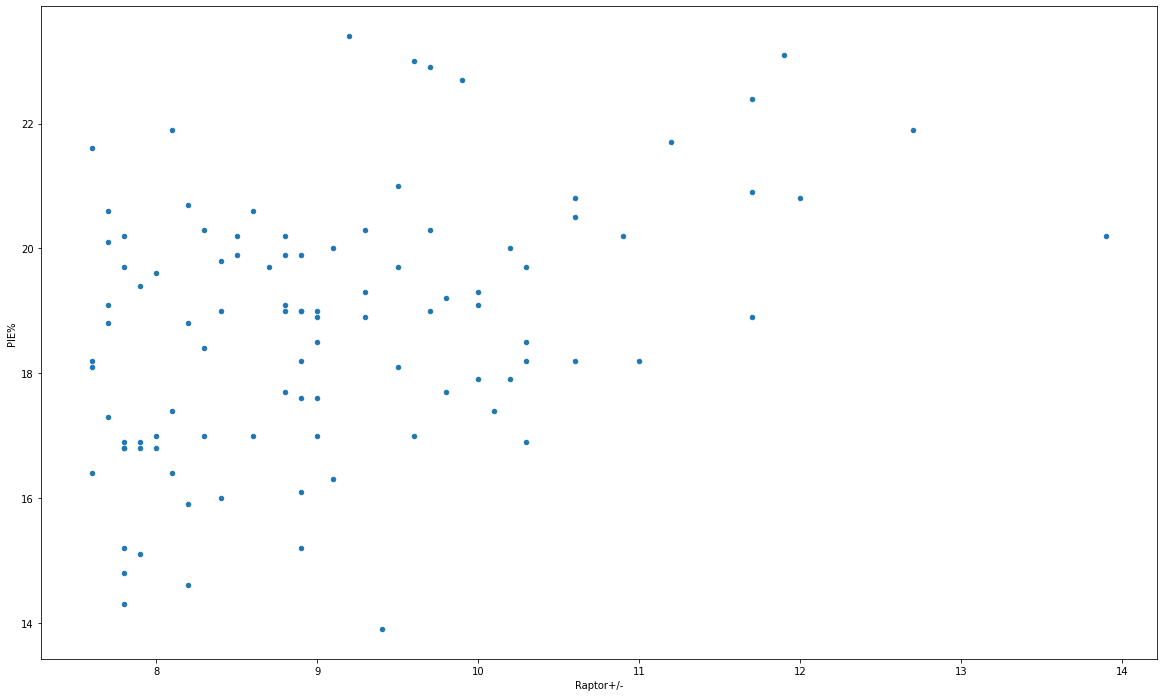

In [48]:
dlist1 = ["franch_id", "STL%", "BLK%", "ORtg", "%Pos", "DRtg", "MP%", "AST%", "TOV%", "ORB%", "DRB%", "TRB%"]


nba1 = nba1.drop(dlist1, axis=1)
rap1 = nba1.sort_values(by=["Raptor+/-"], ascending=False).head(100)
print(rap1)
rap1.to_csv("rap1.csv")
ax = rap1.plot("Raptor+/-", "PIE%", kind="scatter", figsize=(20, 12))
plt.xlabel("Raptor+/-")
plt.ylabel("PIE%")
plt.show()

### Creating a Metric for Individual Success

I want to test the RAPTOR metrics in terms of their ability to accurately display the quality of a player. There are several ways to measure a players success. I decided to create a metric that takes all personal awards for a season into account. There are several awards, the ones i want to consider are:

- MVP (Most Valuable Player): 5 Points
- FMVP (Finals Most Valuable Player): 3 Points
- First Team All NBA: 3 Points
- Second Team All NBA: 2 Points
- Third Team All NBA: 1 Point
- DPOY (Defensive Player Of The Year): 3 Points
- First Team All Defense: 2 Points
- Second Team All Defense: 1 Point


I weighted every award with a value based on how i perceive their importance. The maximum amount of points a player can achieve for a season are 16, because a player can't be selected to both First and Second Team All NBA for example. 

These awards are not perfect for a number of reasons: They are given based on votes by people, who are not perfect either. Sometimes they base their votes on narrative more so than on actual performance. The superstars Michael Jordan and Lebron James probably should have received more MVP awards throughout their careers, but after winning several times voter fatigue sets in and people would rather see someone else win the award. There are ongoing discussions among NBA fans that especially votes for first and second team all defense are often based on reputation and not on actual performance. Assessing defensive performance is much harder for casual viewers, because a lot of the media focus is put on offensive performances. There is also the issue of separating team success and individual success. To this day there are debates about what an MVP actually should be: Is it the player with the best statistical accomplishments? Is it the best player on the best team? Is it the player who elevates his team the most? Different people will give different answers to this question. However, in most cases people will agree on the selections for the major awards. 
There are also awards like Rookie of the Year or Sixth Man Of The Year which i decided not to include, because they tend to be more situational and based on narrative. 

I also considered taking team success like championships or playoff performance into account. However, i decided against it, because these accomplishments are mainly team based, which might distort the analysis. A bench player who plays 5 minutes per game might end up with the same score as the best player on the team.

I am using a data set that includes all personal awards. Since the latest entries in the data set are from 2011 i went into Excel and manually added the missing data points from 2012 - 2020 by referencing <a href="https://en.wikipedia.org/wiki/2019%E2%80%9320_NBA_season#Awards">wikipedia</a>.

In [49]:
players = pd.read_csv("basketball_master.csv")
awards_raw = pd.read_csv("basketball_awards_players.csv")
print(players)


          bioID useFirst firstName middleName      lastName nameGiven  \
0     abdelal01     Alaa      Alaa        NaN     Abdelnaby       NaN   
1     abdulka01   Kareem    Kareem        NaN  Abdul-Jabbar       NaN   
2     abdulma01    Mahdi     Mahdi        NaN  Abdul-Rahman       NaN   
3     abdulma02  Mahmoud   Mahmoud        NaN    Abdul-Rauf       NaN   
4     abdulta01    Tariq     Tariq        NaN   Abdul-Wahad       NaN   
...         ...      ...       ...        ...           ...       ...   
5056   rosegl01     Glen      Glen        NaN          Rose       NaN   
5057  shephle01      Len       Len        NaN      Shepherd       NaN   
5058  glammge01   George    George        NaN      Glammack       NaN   
5059  eurasge01     Gene      Gene        NaN        Eurash       NaN   
5060  koliswa01     Walt      Walt        NaN        Kolish       NaN   

                      fullGivenName nameSuffix  nameNick  pos  ...  \
0                               NaN        NaN       

In [50]:
print(players.columns)
players = players.drop(columns=["firstName", "middleName", "nameGiven", "fullGivenName", "nameSuffix", "nameNick", 
                                "firstseason", "lastseason", "college", "collegeOther", "birthDate", "birthCity", 
                                "birthState", "birthCountry", "highSchool", "hsCity", "hsState", "hsCountry", 
                                "deathDate", "race"])
print(players.head(10))

Index(['bioID', 'useFirst', 'firstName', 'middleName', 'lastName', 'nameGiven',
       'fullGivenName', 'nameSuffix', 'nameNick', 'pos', 'firstseason',
       'lastseason', 'height', 'weight', 'college', 'collegeOther',
       'birthDate', 'birthCity', 'birthState', 'birthCountry', 'highSchool',
       'hsCity', 'hsState', 'hsCountry', 'deathDate', 'race'],
      dtype='object')
       bioID useFirst      lastName  pos  height  weight
0  abdelal01     Alaa     Abdelnaby  F-C    82.0   240.0
1  abdulka01   Kareem  Abdul-Jabbar    C    85.0   225.0
2  abdulma01    Mahdi  Abdul-Rahman    G    74.0   185.0
3  abdulma02  Mahmoud    Abdul-Rauf    G    73.0   162.0
4  abdulta01    Tariq   Abdul-Wahad  G-F    78.0   223.0
5  abdulza01     Zaid    Abdul-Aziz  C-F    81.0   230.0
6   ablefo01   Forest          Able    G    75.0   180.0
7  abramjo01     John     Abramovic    F    75.0   195.0
8  ackeral01     Alex         Acker    G    77.0   185.0
9  acresma01     Mark         Acres  F-C    83.0

In [51]:
print(awards_raw.columns)
awards_raw = awards_raw.drop(columns=["note", "pos"])
print(awards_raw.head(10))
print(awards_raw.sort_values(by="year", ascending=False).head(1))

Index(['playerID', 'award', 'year', 'lgID', 'note', 'pos'], dtype='object')
    playerID                award  year lgID
0  feeribo01   All-NBA First Team  1946  NBA
1  fulksjo01   All-NBA First Team  1946  NBA
2  mckinho01   All-NBA First Team  1946  NBA
3  miasest01   All-NBA First Team  1946  NBA
4  zasloma01   All-NBA First Team  1946  NBA
5  baumhfr01  All-NBA Second Team  1946  NBA
6  calveer01  All-NBA Second Team  1946  NBA
7  halbech01  All-NBA Second Team  1946  NBA
8  loganjo01  All-NBA Second Team  1946  NBA
9  scolafr01  All-NBA Second Team  1946  NBA
       playerID                  award  year lgID
1661  farieke01  All-Rookie First Team  2011  NBA


In [52]:
awards = pd.read_csv("awards.csv", sep=";")
print(awards.columns)
awards = awards.drop(columns=["note", "pos"])
awards.year = awards.year.astype(int)
print(awards.tail(10))


Index(['playerID', 'award', 'year', 'lgID', 'note', 'pos'], dtype='object')
       playerID                         award  year lgID
1906  lillada01           All-NBA Second Team  2018  NBA
1907  irvinky01           All-NBA Second Team  2018  NBA
1908  jamesle01            All-NBA Third Team  2018  NBA
1909  griffbl01            All-NBA Third Team  2018  NBA
1910  goberru01            All-NBA Third Team  2018  NBA
1911  walkeke02            All-NBA Third Team  2018  NBA
1912  westbru01            All-NBA Third Team  2018  NBA
1913  antetgi01          Most Valuable Player  2018  NBA
1914  leonaka01                    Finals MVP  2018  NBA
1915  goberru01  Defensive Player of the Year  2018  NBA


### Calculating award scores

For the next step i am calculating an award score following the methodology that i devised earlier. The raw data has every single award in a string format. There are multiple ways to go about this, for example using a for loop or a function, but i decided to use pandas map feature. This allows me to create a new column based on key and value pairs from a dictionary. This is the most elegant solution in my oppinion.

In [53]:
print(awards["award"].unique())
awards_scores = {"All-NBA First Team": 3, "All-NBA Second Team": 2, "Most Valuable Player": 5, "Finals MVP": 3, 
                 "All-Defensive First Team": 2, "All-Defensive Second Team": 1, "Defensive Player of the Year": 3, 
                 "All-NBA Third Team": 1}
awards["score"] = awards["award"].map(awards_scores)
print(awards.tail(30))

['All-NBA First Team' 'All-NBA Second Team' 'Rookie of the Year'
 'Most Valuable Player' 'All-ABA First Team' 'All-ABA Second Team'
 'Finals MVP' 'All-Defensive First Team' 'All-Defensive Second Team'
 'All-Defensive Team' 'Comeback' 'Defensive Player of the Year'
 'Sixth Man of the Year' 'Most Improved Player' 'All-NBA Third Team'
 'Executive of the Year' 'All-Rookie First Team' 'Sportsmanship Award'
 'All-Rookie Second Team' 'Finals MVP '
 'J. Walter Kennedy Citizenship Award']
       playerID                         award  year lgID  score
1886  duranke01                    Finals MVP  2017  NBA    3.0
1887  goberru01  Defensive Player of the Year  2017  NBA    3.0
1888  antetgi01      All-Defensive First Team  2018  NBA    2.0
1889  georgpa01      All-Defensive First Team  2018  NBA    2.0
1890  goberru01      All-Defensive First Team  2018  NBA    2.0
1891  bledser01      All-Defensive First Team  2018  NBA    2.0
1892  smartma01      All-Defensive First Team  2018  NBA    2.0
189

In [54]:
awards_p = awards.pivot_table("score", ["playerID", "year"], aggfunc="sum").reset_index()
print(awards_p.sort_values(by=["score"], ascending=False).head(20))

       playerID  year  score
1031  olajuha01  1993   16.0
873   malonmo01  1982   13.0
775   jordami01  1990   13.0
1142   reedwi01  1969   13.0
380   duncati01  2002   13.0
682   jamesle01  2012   13.0
780   jordami01  1997   13.0
778   jordami01  1995   13.0
776   jordami01  1991   13.0
772   jordami01  1987   13.0
1046  onealsh01  1999   12.0
127    birdla01  1983   12.0
1     abdulka01  1970   12.0
129    birdla01  1985   11.0
729   johnsma02  1986   11.0
864   malonka01  1996   10.0
35    antetgi01  2018   10.0
379   duncati01  2001   10.0
1187  robinda01  1994   10.0
4     abdulka01  1973   10.0


Top 10 Seasons

1. Hakeem Olajuwon 1993/94 - 16 Points
2. Moses Malone 1982/83 - 13 Points
2. Michael Jordan 1989/90 - 13 Points
2. Willis Reed 1969/1970 - 13 Points
2. Tim Duncan 2002/03 -  13 Points
2. Lebron James 2011/2012 - 13 Points
2. Michael Jordan 1997/98 - 13 Points
2. Michael Jordan 1995/96 - 13 Points
2. Michael Jordan 1991/92 - 13 Points
2. Michael Jordan 1987/88 - 13 Points

Following my methodology, the best individual season based on personal awards was <a href="https://en.wikipedia.org/wiki/1993%E2%80%9394_NBA_season#NBA_awards">Hakeem Olajuwons 1993/94 season</a>. He won MVP, Finals MVP, Defensive Player of the Year, All-NBA First Team and All-Defensive First Team that Year, which makes him the only player to ever win these five awards in a single season. His team the Houston Rockets also won their first championship that year and he was by far the best player on the team. He has a reputation of being the most skilled and most versatile center of all times. 
The second place is a tie between 9(!) seasons, including the players Michael Jordan, Moses Malone, Willis Reed, Tim Duncan and Lebron James.
Five of the Top 10 best seasons belong to Michael Jordan, where he managed to score 13 points each time. 
This methodology appears to favour players who were dominant both defensively and offensively. 

I would like to explore the relationship between the RAPTOR metrics and my award metric next. To simplify this step, it would be helpful to have a column with unique identifiers for certain players and seasons. I will combine the 'playerID' and 'year' columns to create this unique identifier. 

In [55]:
awards_p["player_seasonID"] = awards_p["playerID"] + awards_p["year"].astype(str)
print(awards_p.head(10))
print("unique values: ", awards_p["player_seasonID"].nunique())
print(awards_p.count)
print(awards_p["player_seasonID"].value_counts())
awards1 = awards_p.merge(right=players, left_on=["playerID"], right_on=["bioID"]).copy()
print(awards1.sample(10))
awards1.to_csv("awards1.csv")

    playerID  year  score player_seasonID
0  abdulka01  1969    3.0   abdulka011969
1  abdulka01  1970   12.0   abdulka011970
2  abdulka01  1971    8.0   abdulka011971
3  abdulka01  1972    3.0   abdulka011972
4  abdulka01  1973   10.0   abdulka011973
5  abdulka01  1974    2.0   abdulka011974
6  abdulka01  1975    9.0   abdulka011975
7  abdulka01  1976    9.0   abdulka011976
8  abdulka01  1977    3.0   abdulka011977
9  abdulka01  1978    4.0   abdulka011978
unique values:  1484
<bound method DataFrame.count of        playerID  year  score player_seasonID
0     abdulka01  1969    3.0   abdulka011969
1     abdulka01  1970   12.0   abdulka011970
2     abdulka01  1971    8.0   abdulka011971
3     abdulka01  1972    3.0   abdulka011972
4     abdulka01  1973   10.0   abdulka011973
...         ...   ...    ...             ...
1479  youngth01  2007    0.0   youngth012007
1480  zasloma01  1946    3.0   zasloma011946
1481  zasloma01  1947    3.0   zasloma011947
1482  zasloma01  1948    3.0   zas

In [56]:
rap1["player_seasonID"] = rap1["player_id"] + rap1["year_id"].astype(str)
awards2 = awards1.merge(right=rap1, left_on=["player_seasonID"], right_on=["player_seasonID"]).copy()
awards3 = awards2[["player_seasonID", "score", "Raptor O", "Raptor D", "Raptor+/-", "Raptor WAR"]]
print(awards3.sample(10))

   player_seasonID  score  Raptor O  Raptor D  Raptor+/-  Raptor WAR
57   robinda011994   10.0       4.9       4.7        9.5        20.2
10   curryst012017    1.0       8.7      -0.2        8.4        15.6
34   jordami011991   13.0       8.8       3.1       12.0        22.7
54   pippesc011995    5.0       3.5       4.2        7.8        16.2
45   onealsh012002    4.0       4.5       3.4        8.0        13.2
9    curryst012016    2.0      11.1       2.8       13.9        23.7
40   leonaka012015    8.0       3.7       5.2        8.9        12.1
5     birdla011987    3.0       7.0       2.0        9.0        17.9
21   jamesle012010    5.0       9.5       2.2       11.7        21.8
48    paulch012012    5.0       8.1       1.9       10.0        14.2


### Correlations between Awards Score and RAPTOR

Here are the correlations between my Awards Score metric and the RAPTOR metrics:
- Awards Score / Raptor O: -0.05
- Awards Score / Raptor D: 0.14
- Awards Score / Raptor +/-: 0.076
- Awards Score / Raptor WAR: 0.23

I could not find a significant correlation between the Awards Score and Raptor O. The correlation between the Awards Score and Raptor D is very weak. There is also no significant correlation between the Awards Score and Raptor +/-. The correlation between the Awards Score and Raptor WAR is also weak.

Let's take a closer look at the Raptor WAR metric. WAR stands for win above replacement.



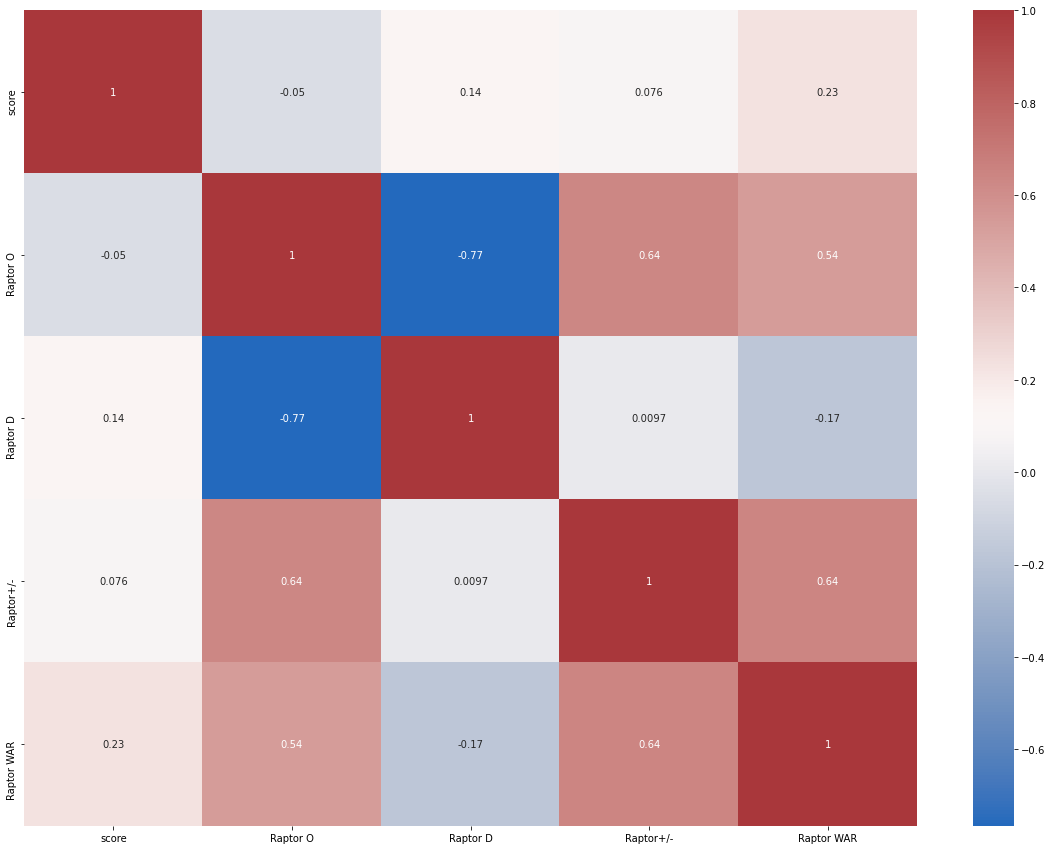

In [57]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(awards3.corr(), cmap = "vlag", annot = True)

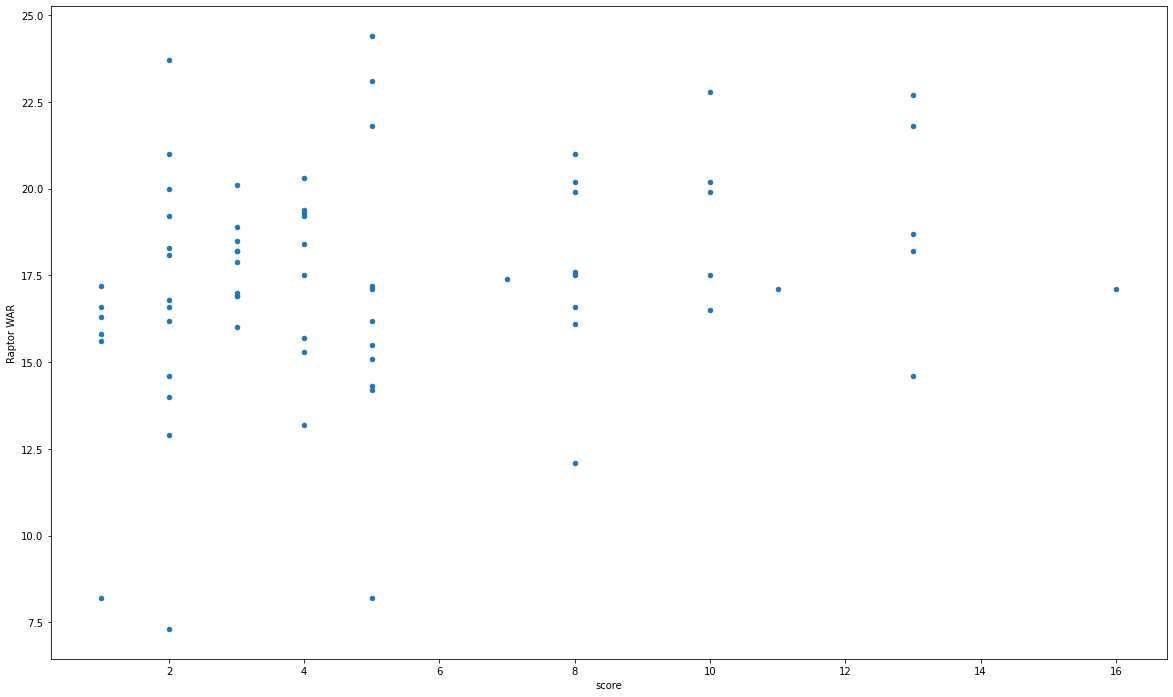

In [58]:
ax2 = awards3.plot("score", "Raptor WAR", kind="scatter", figsize=(20, 12))

### Interpreting the results

The absence of a correlation between 'Raptor O' and the awards score might seem confusing at first, but actually makes sense considering the data use. Almost all players in the awards score data set are considered stars, who contribute significantly to their teams offense. There are some exceptions 

In [63]:
print(awards2.sort_values(by="score").head(50))

     playerID  year  score player_seasonID      bioID   useFirst   lastName  \
67   wadedw01  2006    1.0    wadedw012006   wadedw01     Dwyane       Wade   
16  hardaan01  1996    1.0   hardaan011996  hardaan01   Anfernee   Hardaway   
14  garneke01  2005    1.0   garneke012005  garneke01      Kevin    Garnett   
6   blaylmo01  1997    1.0   blaylmo011997  blaylmo01     Mookie   Blaylock   
59  robinda01  1999    1.0   robinda011999  robinda01      David   Robinson   
10  curryst01  2017    1.0   curryst012017  curryst01    Stephen      Curry   
69   wadedw01  2010    2.0    wadedw012010   wadedw01     Dwyane       Wade   
52   paulch01  2016    2.0    paulch012016   paulch01      Chris       Paul   
15  garneke01  2008    2.0   garneke012008  garneke01      Kevin    Garnett   
56  robinda01  1992    2.0   robinda011992  robinda01      David   Robinson   
39  kirilan01  2005    2.0   kirilan012005  kirilan01     Andrei  Kirilenko   
9   curryst01  2016    2.0   curryst012016  curryst0